# **Practice Lab: CNN for CIFAR10** 

Training cifar10 Dataset with a CNN model (using tensorflow)


# Outline
- [Packages ](#1)
- [Loading Data ](#2)
  - [Dataset overview](#2.1)
- [Modeling](#3)
  - [MLP](#3.1)
  - [CNN](#3.2)
- [Evaluating](#4)

    



<a name="1"></a>
## 1 - **Packages** 




In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,BatchNormalization,Dropout,LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix , classification_report
from keras.layers import AveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from keras.utils import plot_model

<a name="2"></a>
## 2 - **Loading Data** 



In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

<a name="2.1"></a>
## Dataset overview

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
y_train.size

50000

In [5]:
x_train.size

153600000

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [3]:
labels = ["airplane"
,"automobile"
, "bird" 
, "cat" 
,"deer" 
,"dog" 
,"frog" 
,"horse" 
,"ship" 
,"truck"]

Plotting

horse


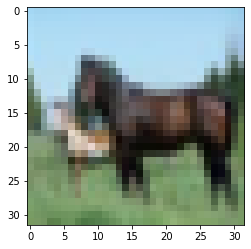

In [8]:
plt.imshow(x_train[12])
print(labels[int(y_train[12])])

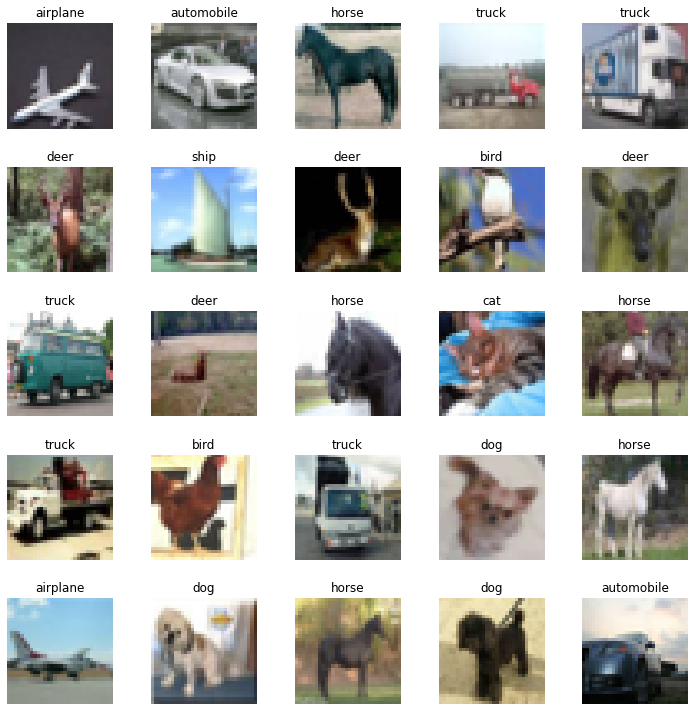

In [38]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
X = x_train
fig, axes = plt.subplots(5,5, figsize=(10,10))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(50000)
    ax.imshow(X[random_index], cmap='gray')
    ax.set_title(labels[int(y_train[random_index])])
    ax.set_axis_off()

<a name="3"></a>
## 3 - **Modeling** 

First we should Normalize our date  

In [4]:
x_train = x_train / 255.0
x_test  = x_test / 255.0

In [2]:
#Classification report

Define classificationReport method :

# Precision
Is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

# Recall
The ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives.

# F1-score
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.


In [5]:
def ClassificationReport(model):
    y_pred = model.predict(x_test)
    y_pred_classes = [np.argmax(element) for element in y_pred]
    print("Classification Report: \n", classification_report(y_test, y_pred_classes))
    


<a name="3.1"></a>
# 3.1 - **simple MLP model :**

In [15]:
mlp = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(2048, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

mlp.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 45s 28ms/step - loss: 1.8193 - accuracy: 0.3528
Epoch 2/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.6319 - accuracy: 0.4241
Epoch 3/5
1563/1563 [==============================] - 51s 33ms/step - loss: 1.5473 - accuracy: 0.4541
Epoch 4/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4916 - accuracy: 0.4750
Epoch 5/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4398 - accuracy: 0.4910


In [19]:
#Evaluating the MLP model

In [16]:
mlp.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.4760 - accuracy: 0.4643


[1.4760462045669556, 0.4643000066280365]

In [34]:
ClassificationReport(mlp)

313/313 [==============================] - 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.53      0.55      1000
           1       0.41      0.82      0.54      1000
           2       0.29      0.50      0.37      1000
           3       0.44      0.23      0.30      1000
           4       0.43      0.31      0.36      1000
           5       0.44      0.35      0.39      1000
           6       0.51      0.55      0.53      1000
           7       0.62      0.45      0.52      1000
           8       0.58      0.65      0.61      1000
           9       0.66      0.26      0.37      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000



# 

Now we use CNN model


<a name="3.2"></a>
# 3.2 - **CNN**

In [26]:
cnn = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [27]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4031 - accuracy: 0.4982
Epoch 2/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0560 - accuracy: 0.6318
Epoch 3/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9153 - accuracy: 0.6818
Epoch 4/5
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8116 - accuracy: 0.7183
Epoch 5/5
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7234 - accuracy: 0.7449


In [28]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9776 - accuracy: 0.6693


[0.9776250123977661, 0.6693000197410583]

In [39]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_9 (Dense)             (None, 128)              

# 

In [30]:
cnn64 = Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [38]:
cnn64.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.4424 - accuracy: 0.4808
Epoch 2/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0780 - accuracy: 0.6230
Epoch 3/5
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9444 - accuracy: 0.6707
Epoch 4/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8539 - accuracy: 0.6999
Epoch 5/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7867 - accuracy: 0.7256


In [40]:
cnn64.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9197 - accuracy: 0.6845


[0.9196601510047913, 0.684499979019165]

In [41]:
ClassificationReport(cnn64)

313/313 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      1000
           1       0.82      0.80      0.81      1000
           2       0.64      0.50      0.56      1000
           3       0.55      0.47      0.51      1000
           4       0.65      0.56      0.60      1000
           5       0.58      0.59      0.58      1000
           6       0.69      0.81      0.74      1000
           7       0.71      0.73      0.72      1000
           8       0.79      0.82      0.80      1000
           9       0.66      0.85      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



# 

In [48]:
cnn32 = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [49]:
cnn32.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn32.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5680 - accuracy: 0.4231
Epoch 2/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2152 - accuracy: 0.5671
Epoch 3/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0814 - accuracy: 0.6172
Epoch 4/5
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9920 - accuracy: 0.6534
Epoch 5/5
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9175 - accuracy: 0.6798


# 

# Types of Pooling Layers

In [75]:
#Max pooling (32)

Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map. 

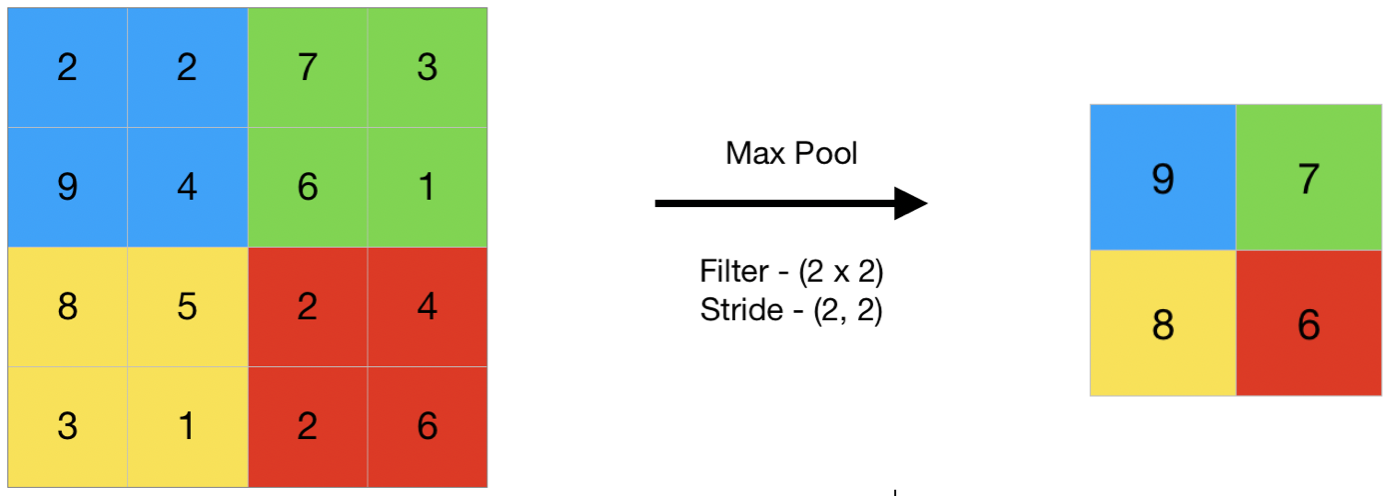

In [76]:
cnn_MaxPooling32 = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [77]:
cnn_MaxPooling32.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn_MaxPooling32.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4437 - accuracy: 0.4859
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1487 - accuracy: 0.5963
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0188 - accuracy: 0.6433
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9241 - accuracy: 0.6765
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8518 - accuracy: 0.7027


accuracy: 0.7027

In [78]:
#Max pooling (64)

In [79]:
cnn_MaxPooling64 = Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

I use a bigger epoch number for this model because it was too close to average pooling

In [100]:
cnn_MaxPooling64.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn_MaxPooling64.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.0662 - accuracy: 0.9780
Epoch 2/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0594 - accuracy: 0.9801
Epoch 3/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.0585 - accuracy: 0.9817
Epoch 4/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.0549 - accuracy: 0.9824
Epoch 5/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.0588 - accuracy: 0.9812
Epoch 6/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.0580 - accuracy: 0.9817
Epoch 7/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.0614 - accuracy: 0.9810
Epoch 8/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.0563 - accuracy: 0.9824
Epoch 9/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.0490 - accuracy: 0.9842
Epoch 10/20
1563/1563 [==============================] - 37s 23m

loss: 0.0512 - accuracy: 0.9842

In [72]:
#Average pooling

Average pooling computes the average of the elements present in the region of feature map covered by the filter. Thus, while max pooling gives the most prominent feature in a particular patch of the feature map, average pooling gives the average of features present in a patch. 

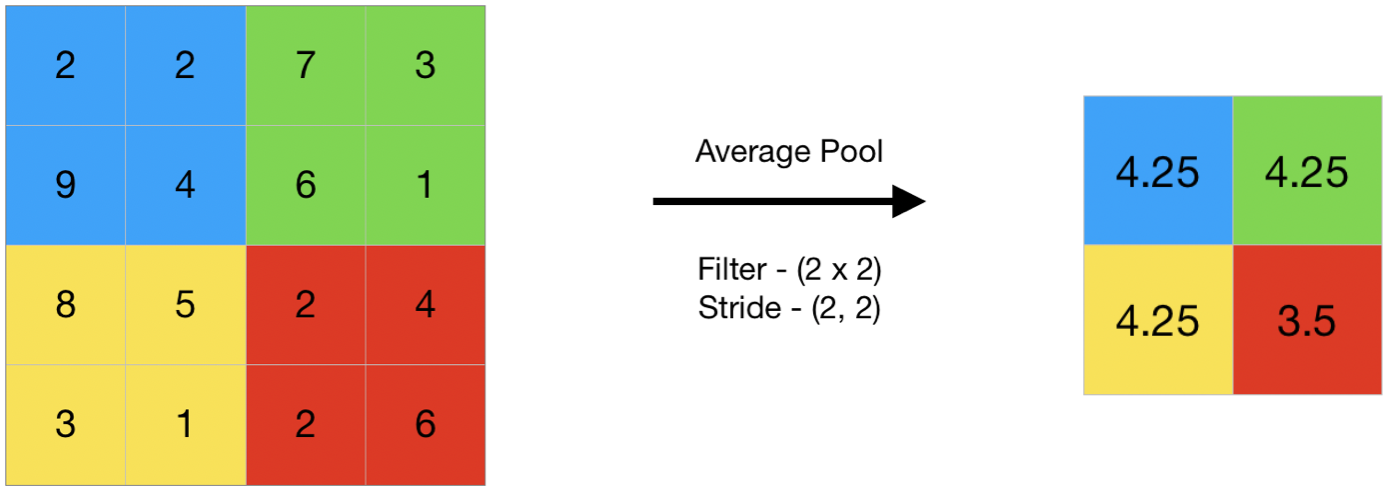

In [81]:
cnn_AveragePooling = Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    AveragePooling2D(pool_size = 2, strides = 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [101]:
cnn_AveragePooling.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn_AveragePooling.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.0583 - accuracy: 0.9804
Epoch 2/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0597 - accuracy: 0.9809
Epoch 3/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0576 - accuracy: 0.9825
Epoch 4/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0499 - accuracy: 0.9841
Epoch 5/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0516 - accuracy: 0.9838
Epoch 6/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0558 - accuracy: 0.9827
Epoch 7/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0501 - accuracy: 0.9848
Epoch 8/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0472 - accuracy: 0.9856
Epoch 9/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0437 - accuracy: 0.9866
Epoch 10/20
1563/1563 [==============================] - 34s 22m

loss: 0.0327 - accuracy: 0.9903

In [73]:
#Global pooling

Global pooling reduces each channel in the feature map to a single value. Thus, an nh x nw x nc feature map is reduced to 1 x 1 x nc feature map. This is equivalent to using a filter of dimensions nh x nw i.e. the dimensions of the feature map. 

In [178]:
cnn_GlobalPooling = Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [179]:
cnn_GlobalPooling.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn_GlobalPooling.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 15s 10ms/step - loss: 2.0315 - accuracy: 0.2330
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7967 - accuracy: 0.3192
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7135 - accuracy: 0.3510
Epoch 4/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6892 - accuracy: 0.3646
Epoch 5/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6691 - accuracy: 0.3740


 accuracy: 0.3740

In [102]:
cnn_AveragePooling.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 4.3350 - accuracy: 0.6109


[4.334970951080322, 0.6108999848365784]

In [103]:
cnn_MaxPooling64.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 4.2818 - accuracy: 0.6206


[4.2817840576171875, 0.6205999851226807]

# 

In [114]:
#Let's combine these for the best result

In [6]:
cnn_Final = Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    AveragePooling2D(pool_size = 2, strides = 2),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [7]:
cnn_Final.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn_Final.fit(x_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 63s 40ms/step - loss: 1.2560 - accuracy: 0.5557
Epoch 2/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8956 - accuracy: 0.6872
Epoch 3/15
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6932 - accuracy: 0.7587
Epoch 4/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5263 - accuracy: 0.8137
Epoch 5/15
1563/1563 [==============================] - 65s 41ms/step - loss: 0.3675 - accuracy: 0.8719
Epoch 6/15
1563/1563 [==============================] - 65s 41ms/step - loss: 0.2514 - accuracy: 0.9128
Epoch 7/15
1563/1563 [==============================] - 65s 41ms/step - loss: 0.1922 - accuracy: 0.9323
Epoch 8/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.1448 - accuracy: 0.9492
Epoch 9/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.1282 - accuracy: 0.9571
Epoch 10/15
1563/1563 [==============================] - 64s 41m

In [115]:
#First try

In [111]:
cnn_Final.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 average_pooling2d_8 (Averag  (None, 15, 15, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_48 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_27 (Flatten)        (None, 2304)              0         
                                                                 
 dense_66 (Dense)            (None, 128)             

loss: 0.4474 - accuracy: 0.8409

In [116]:
#Second try

In [117]:
cnn_Final.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 average_pooling2d_9 (Averag  (None, 15, 15, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_50 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_28 (Flatten)        (None, 2304)              0         
                                                                 
 dense_68 (Dense)            (None, 256)             

loss: 0.1076 - accuracy: 0.9618

In [127]:
#Third Try

In [126]:
cnn_Final.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 average_pooling2d_13 (Avera  (None, 15, 15, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_58 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_32 (Flatten)        (None, 2304)              0         
                                                                 
 dense_75 (Dense)            (None, 256)             

loss: 0.1673 - accuracy: 0.9415

In [128]:
# 4th try

In [131]:
cnn_Final.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 average_pooling2d_14 (Avera  (None, 15, 15, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_60 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_33 (Flatten)        (None, 2304)              0         
                                                                 
 dense_78 (Dense)            (None, 512)             

loss: 0.0787 - accuracy: 0.9730

In [136]:
# 5th try

In [137]:
cnn_Final.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 average_pooling2d_16 (Avera  (None, 15, 15, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_64 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_35 (Flatten)        (None, 2304)              0         
                                                                 
 dense_83 (Dense)            (None, 1024)            

loss: 0.2206 - accuracy: 0.9224

In [14]:
#Final try

In [15]:
cnn_Final.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                                 
                                                                 
 average_pooling2d_1 (Averag  (None, 15, 15, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

# 

<a name="4"></a>
# 4 - **Let's evaluate our model**

In [9]:
cnn_Final.evaluate(x_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 2.2765 - accuracy: 0.6839


[2.2765324115753174, 0.683899998664856]

loss: 2.2765 - accuracy: 0.6839

In [10]:
ClassificationReport(cnn_Final)

313/313 [==============================] - 6s 18ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.73      0.74      1000
           1       0.84      0.80      0.82      1000
           2       0.57      0.57      0.57      1000
           3       0.46      0.52      0.48      1000
           4       0.69      0.57      0.62      1000
           5       0.57      0.56      0.57      1000
           6       0.70      0.81      0.75      1000
           7       0.76      0.70      0.73      1000
           8       0.77      0.83      0.80      1000
           9       0.78      0.75      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



As you can see we got a big loss number for testing data

Now we prevent overfitting for our model

In [18]:
cnn_Final = Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    AveragePooling2D(pool_size = 2, strides = 2),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn_Final.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Try with binary cross entropy

In [21]:
y_categorical_train = to_categorical(y_train, 10)
y_categorical_test = to_categorical(y_test, 10)

In [20]:
cnn_Final.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = cnn_Final.fit(x_train, y_categorical_train, validation_data=(x_test, y_categorical_test), epochs=30, batch_size=300)

Epoch 1/30
167/167 [==============================] - 45s 269ms/step - loss: 0.3981 - accuracy: 0.8574 - val_loss: 0.9374 - val_accuracy: 0.7174
Epoch 2/30
167/167 [==============================] - 46s 277ms/step - loss: 0.3630 - accuracy: 0.8716 - val_loss: 0.9013 - val_accuracy: 0.7200
Epoch 3/30
167/167 [==============================] - 46s 277ms/step - loss: 0.3426 - accuracy: 0.8773 - val_loss: 0.9034 - val_accuracy: 0.7403
Epoch 4/30
167/167 [==============================] - 46s 277ms/step - loss: 0.3205 - accuracy: 0.8847 - val_loss: 0.9211 - val_accuracy: 0.7420
Epoch 5/30
167/167 [==============================] - 47s 282ms/step - loss: 0.2999 - accuracy: 0.8915 - val_loss: 0.9022 - val_accuracy: 0.7412
Epoch 6/30
167/167 [==============================] - 49s 294ms/step - loss: 0.2827 - accuracy: 0.8980 - val_loss: 1.0733 - val_accuracy: 0.7187
Epoch 7/30
167/167 [==============================] - 48s 287ms/step - loss: 0.2713 - accuracy: 0.9026 - val_loss: 1.0044 - val_ac

In [29]:
Y_prediction = cnn_Final.predict(x_test)

313/313 [==============================] - 4s 11ms/step


In [30]:
Y_prediction.shape

(10000, 10)

In [31]:
Y_prediction

array([[2.23211202e-04, 5.51889316e-05, 1.63338453e-04, ...,
        8.09079211e-05, 7.35946838e-03, 4.46087643e-06],
       [7.68834725e-03, 3.08940606e-03, 9.68137073e-08, ...,
        2.80909296e-10, 9.89222050e-01, 6.19801526e-08],
       [3.45634848e-01, 3.07994578e-02, 8.07335135e-03, ...,
        7.35095423e-03, 6.00531280e-01, 1.98803213e-03],
       ...,
       [8.19458066e-08, 2.57242959e-07, 2.24625575e-04, ...,
        6.04846049e-03, 1.22072993e-06, 1.16995146e-07],
       [3.10936980e-02, 5.96647933e-02, 4.47810907e-03, ...,
        5.71781397e-03, 2.54460581e-04, 6.01701288e-07],
       [7.11552605e-12, 5.51200578e-13, 9.32100264e-08, ...,
        9.99882936e-01, 1.24371059e-14, 6.78344672e-11]], dtype=float32)

In [32]:
classes_x = np.argmax(Y_prediction, axis=1)

In [34]:
classes_x.shape

(10000,)

Model Predict/Reality


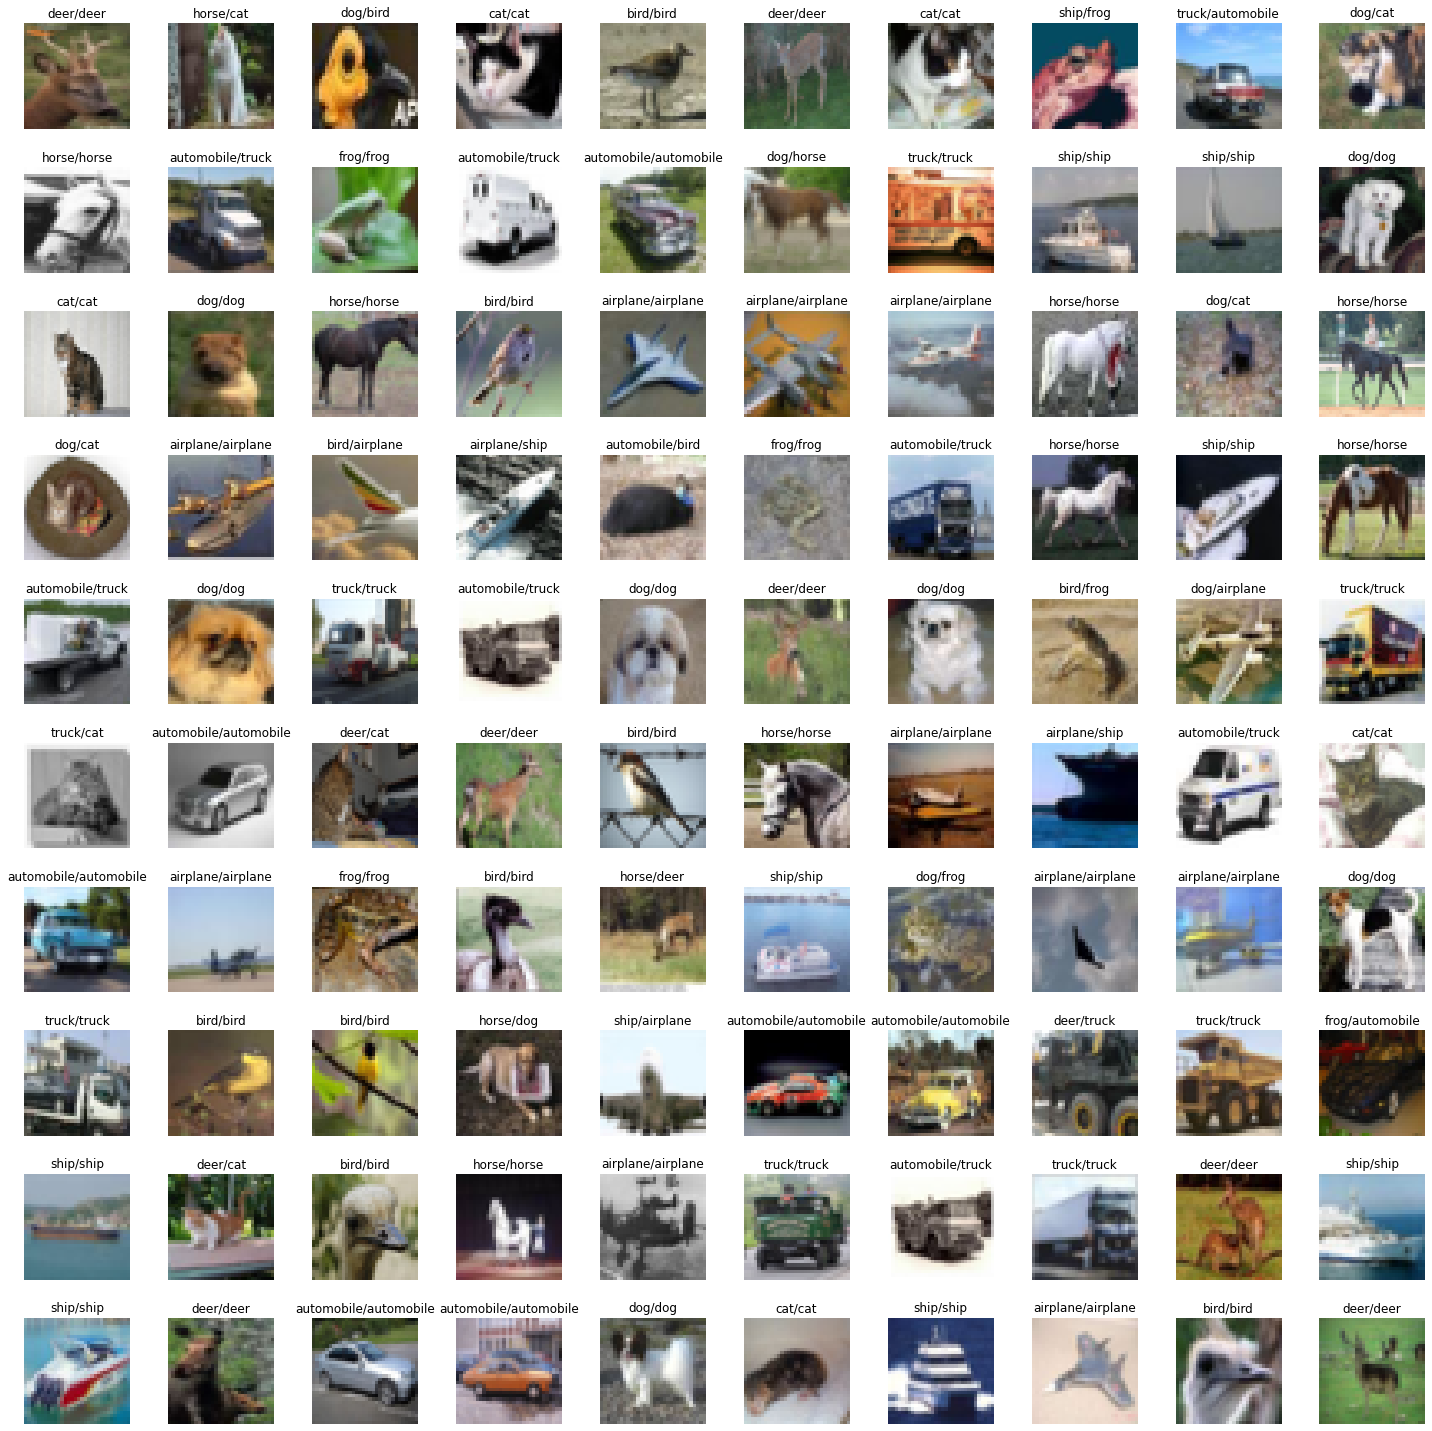

In [65]:
warnings.simplefilter(action='ignore', category=FutureWarning)
X = x_test
fig, axes = plt.subplots(10,10, figsize=(20,20))
fig.tight_layout(pad=0.1)
print("Model Predict/Reality")
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(10000)
    ax.imshow(X[random_index], cmap='gray')
    ax.set_title(labels[int(classes_x[random_index])]+"/" +labels[int(y_test[random_index])])
    ax.set_axis_off()

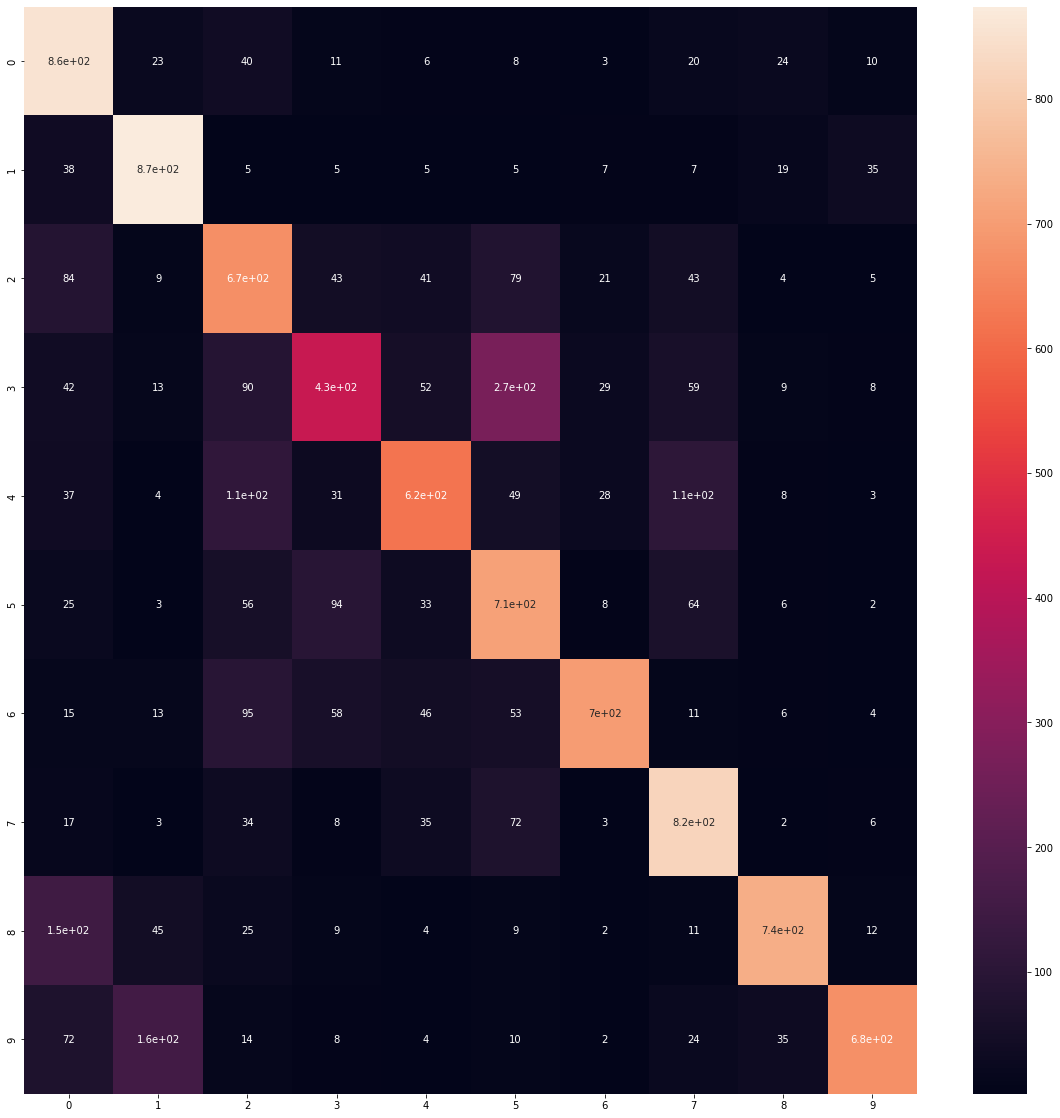

In [52]:
plt.figure(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test, classes_x), annot=True)
plt.show()

ARIA HASSANALI ARAGH . 99222032 